<a href="https://colab.research.google.com/github/datakind/UWWi_DataDive_Dec22/blob/main/United_Way_WI_KW_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# United way WI Breakout room 2

## Standard libraries and data loading functions

In [4]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import os
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html
import regex as re

# 211 Data Analysis: Kimberly W


In [5]:
import pandas as pd
sites = pd.read_csv('https://github.com/datakind/UWWi_DataDive_Dec22/blob/main/uwwi_datasets/uwwi_dataset_sites.csv?raw=true')

In [6]:
sites.head()


,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_AuditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
0,INTEGRATED COMMUNITY SOLUTIONS,1,414.0,1.0,2017-03-16T10:32:21.216012-05:00,2022-05-12T12:53:25.967449-05:00,NaN,active,Yes,INTEGRATED COMMUNITY SOLUTIONS,...,True,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",[],['BCUW'],[],Monday-Friday 8am-4:30pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
1,INTEGRATED COMMUNITY SOLUTIONS,1,418.0,1.0,2017-03-16T10:32:22.867221-05:00,2021-10-21T19:48:22.74763-05:00,NaN,active,No,ZZZINACTIVE LEAVING HOMELESSNESS BEHIND,...,False,False,44.489906,-88.06991,2605 South Oneida Street Suite 106 Green Bay W...,[],['BCUW'],[],"Monday-Friday, 8:00am-4:30pm","[{'day': -1, 'end_min': None, 'end_hour': None..."
2,INTERIM HEALTH CARE,2,419.0,2.0,2017-03-16T10:32:23.227182-05:00,2022-11-30T13:36:50.613023-06:00,NaN,active,Yes,INTERIM HEALTH CARE,...,False,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",[],['BCUW'],[],Monday-Friday 8:30am-5:00pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
3,zzinactive_INTERNATIONAL TRANSLATORS,3,420.0,3.0,2017-03-16T10:32:23.567045-05:00,2021-07-27T23:57:41.974815-05:00,NaN,active,No,zzinactive_VILLA REAL DBA INTERNATIONAL TRANSL...,...,False,False,44.483376,-88.02269,529 South Jefferson Street Suite 203 Green Bay...,[],['BCUW'],"['Elevators', 'Outside Ramps']","Monday-Friday, 8:00am-5:00pm; Interpreters ava...","[{'day': -1, 'end_min': None, 'end_hour': None..."
4,JACKIE NITSCHKE CENTER,4,421.0,4.0,2017-03-16T10:32:23.869975-05:00,2022-09-28T10:20:58.151543-05:00,NaN,active,Yes,JACKIE NITSCHKE CENTER,...,True,False,44.483376,-88.02269,"630 CHERRY STREET GREEN BAY WI, 54301",[],['BCUW'],[],Business hours: Monday-Thursday 7am-6:30pm; Fr...,"[{'day': -1, 'end_min': None, 'end_hour': None..."


In [7]:
sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20583 entries, 0 to 20582
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   AgencySystem_Name                                 20572 non-null  object 
 1   Agency_Id                                         20583 non-null  int64  
 2   Site_Id                                           20071 non-null  float64
 3   Site_AgencyId                                     20071 non-null  float64
 4   Site_CreateStamp                                  20071 non-null  object 
 5   Site_EditStamp                                    20071 non-null  object 
 6   Site_AuditStamp                                   0 non-null      float64
 7   Site_Status                                       20071 non-null  object 
 8   SiteSystem_Active                                 20583 non-null  object 
 9   SiteSystem_Name  

In [8]:
import seaborn as sns


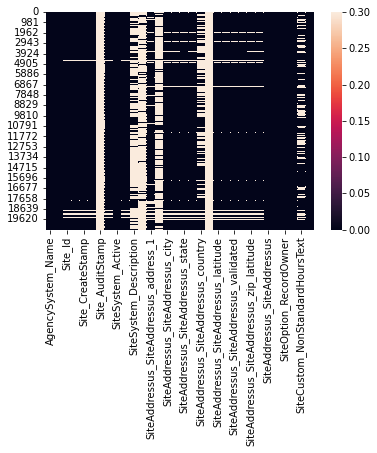

In [9]:
sns.heatmap(sites.isnull(),cbar=True, vmin=0,vmax=.3)

In [10]:
sites.isnull().sum() # There is signnificant absence of data in Auditstamp, address2,notes, and description.  The lattermost is unfortunate as it would help us to map out types of service by location. Might be 
#able to determine what types of service they provde based on agency ID and map it. ** TO DO


AgencySystem_Name                                      11
Agency_Id                                               0
Site_Id                                               512
Site_AgencyId                                         512
Site_CreateStamp                                      512
Site_EditStamp                                        512
Site_AuditStamp                                     20583
Site_Status                                           512
SiteSystem_Active                                       0
SiteSystem_Name                                       512
SiteSystem_Description                              13156
SiteSystem_TravelInformation                        19232
SiteAddressus_SiteAddressus_address_1                2247
SiteAddressus_SiteAddressus_address_2               17645
SiteAddressus_SiteAddressus_city                      888
SiteAddressus_SiteAddressus_county                   1038
SiteAddressus_SiteAddressus_state                     925
SiteAddressus_

In [11]:
sites.shape

(20583, 32)

In [12]:
drop_cols = ['Site_AuditStamp','SiteSystem_TravelInformation','SiteAddressus_SiteAddressus_address_2','SiteAddressus_SiteAddressus_notes']


In [13]:
sites.drop(drop_cols, inplace = True, axis = 1)

In [14]:
sites.head()

,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,SiteSystem_Description,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
0,INTEGRATED COMMUNITY SOLUTIONS,1,414.0,1.0,2017-03-16T10:32:21.216012-05:00,2022-05-12T12:53:25.967449-05:00,active,Yes,INTEGRATED COMMUNITY SOLUTIONS,NaN,...,True,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",[],['BCUW'],[],Monday-Friday 8am-4:30pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
1,INTEGRATED COMMUNITY SOLUTIONS,1,418.0,1.0,2017-03-16T10:32:22.867221-05:00,2021-10-21T19:48:22.74763-05:00,active,No,ZZZINACTIVE LEAVING HOMELESSNESS BEHIND,NaN,...,False,False,44.489906,-88.06991,2605 South Oneida Street Suite 106 Green Bay W...,[],['BCUW'],[],"Monday-Friday, 8:00am-4:30pm","[{'day': -1, 'end_min': None, 'end_hour': None..."
2,INTERIM HEALTH CARE,2,419.0,2.0,2017-03-16T10:32:23.227182-05:00,2022-11-30T13:36:50.613023-06:00,active,Yes,INTERIM HEALTH CARE,NaN,...,False,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",[],['BCUW'],[],Monday-Friday 8:30am-5:00pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
3,zzinactive_INTERNATIONAL TRANSLATORS,3,420.0,3.0,2017-03-16T10:32:23.567045-05:00,2021-07-27T23:57:41.974815-05:00,active,No,zzinactive_VILLA REAL DBA INTERNATIONAL TRANSL...,NaN,...,False,False,44.483376,-88.02269,529 South Jefferson Street Suite 203 Green Bay...,[],['BCUW'],"['Elevators', 'Outside Ramps']","Monday-Friday, 8:00am-5:00pm; Interpreters ava...","[{'day': -1, 'end_min': None, 'end_hour': None..."
4,JACKIE NITSCHKE CENTER,4,421.0,4.0,2017-03-16T10:32:23.869975-05:00,2022-09-28T10:20:58.151543-05:00,active,Yes,JACKIE NITSCHKE CENTER,NaN,...,True,False,44.483376,-88.02269,"630 CHERRY STREET GREEN BAY WI, 54301",[],['BCUW'],[],Business hours: Monday-Thursday 7am-6:30pm; Fr...,"[{'day': -1, 'end_min': None, 'end_hour': None..."


In [15]:
sites['SiteSystem_Description'].describe()

count                                                  7427
unique                                                 5943
top       Narcotics Anonymous is a nonprofit fellowship ...
freq                                                     79
Name: SiteSystem_Description, dtype: object

In [16]:
sites['SiteOption_PermanentlyInactiveSite'].head(20)

0                                []
1                                []
2                                []
3                                []
4                                []
5                   ['Yes - Other']
6     ['Yes - Closed Organization']
7                                []
8                                []
9                                []
10                               []
11                               []
12                               []
13                               []
14                           ['No']
15                               []
16    ['Yes - Closed Organization']
17                               []
18                               []
19                               []
Name: SiteOption_PermanentlyInactiveSite, dtype: object

In [17]:
closed = sites[sites['SiteOption_PermanentlyInactiveSite'].str.contains('Yes')] #these sites are closed...some permanently but for purpose of analysis going to omit.
closed

,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,SiteSystem_Description,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
5,ZZZANGELS ON HUMBOLDT,5,424.0,5.0,2017-03-16T10:32:24.982683-05:00,2022-10-31T08:35:10.985868-05:00,active,No,ZZZANGELS ON HUMBOLDT,NaN,...,False,False,44.519512,-87.90283,"653 Woodside Road Green Bay WI, 54311",['Yes - Other'],['BCUW'],[],"Available 24 hours a day, seven days a week","[{'day': -1, 'end_min': None, 'end_hour': None..."
6,ZZZKRIDER'S PHARMACY,6,425.0,6.0,2017-03-16T10:32:25.301894-05:00,2021-10-28T12:29:13.795355-05:00,active,No,ZZZKRIDER'S PHARMACY,NaN,...,False,False,44.542973,-88.05582,"1119 West Mason Street Green Bay WI, 54303",['Yes - Closed Organization'],['BCUW'],[],"Monday-Friday, 8:00am-7:00pm; Saturday, 9:00am...","[{'day': -1, 'end_min': None, 'end_hour': None..."
16,ZZZ INACTIVE AMERICAN CANCER SOCIETY- GREEN BAY,16,435.0,16.0,2017-03-16T10:32:29.650615-05:00,2021-11-16T11:42:49.619419-06:00,active,No,ZZZ INACTIVE AMERICAN CANCER SOCIETY- GREEN BAY,NaN,...,True,False,44.483376,-88.02269,"2100 RIVERSIDE DRIVE STE 201 GREEN BAY WI, 54301",['Yes - Closed Organization'],['BCUW'],[],Green Bay Office Hours: Monday-Friday 8 am-4:3...,"[{'day': -1, 'end_min': None, 'end_hour': None..."
28,ZZZ NORTH EAST WISCONSIN AREA OF NARCOTICS ANO...,28,447.0,28.0,2017-03-16T10:32:34.8988-05:00,2022-10-26T08:15:19.29677-05:00,active,No,ZZZ NORTH EAST WISCONSIN AREA OF NARCOTICS ANO...,A substance abuse support group for men and wo...,...,False,False,44.519500,-88.01990,"PO Box 10035 Green Bay WI, 54307",['Yes - Other'],['BCUW'],[],Meetings are held at various times and locatio...,"[{'day': -1, 'end_min': None, 'end_hour': None..."
31,ZZZ INACTIVE NATIONAL ASSOCIATION FOR CONTINENCE,30,455.0,30.0,2017-03-16T10:32:39.348388-05:00,2021-11-16T11:05:52.70937-06:00,active,No,ZZZ INACTIVE NATIONAL ASSOCIATION FOR CONTINENCE,NaN,...,False,False,32.776500,-79.93120,"PO Box 1019 Charleston SC, 29402",['Yes - Other'],['BCUW'],[],"Monday-Friday, 9:00am-5:00pm eastern standard ...","[{'day': -1, 'end_min': None, 'end_hour': None..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20094,ZZZ - ASCENSION SOUTHEAST WISCONSIN - SETON DE...,23745,37818.0,23745.0,2022-03-31T15:34:23.258248-05:00,2022-11-22T08:14:35.466054-06:00,active,No,ZZZ - ASCENSION SOUTHEAST WISCONSIN - SETON DE...,NaN,...,True,False,43.003590,-87.94333,"3267 South 16th Street Suite 101 Milwaukee WI,...",['Yes - Record Moved Elsewhere'],['IPCT'],"['Designated Parking', 'Indoor Wheelchair Acce...","Monday, Wednesday 8am-4:30pm.","[{'day': -1, 'end_min': None, 'end_hour': None..."
20133,ZZZENERGY SERVICES - VILAS COUNTY,23771,37878.0,23771.0,2022-04-20T14:21:34.298942-05:00,2022-09-28T08:15:43.092298-05:00,active,No,ZZZENERGY SERVICES - VILAS COUNTY,NaN,...,True,False,45.951385,-89.26006,"115 South 3rd Street Eagle River WI, 54521",['Yes - Record Moved Elsewhere'],['WIMC'],[],NaN,"[{'day': -1, 'end_min': None, 'end_hour': None..."
20173,ZZZ - TATE,23786,37907.0,23786.0,2022-05-05T09:12:50.35214-05:00,2022-08-24T10:48:23.848871-05:00,active,No,ZZZ - TATE,NaN,...,True,False,43.088013,-87.97704,"4222 West Capitol Drive Suite 7 Milwaukee WI,...",['Yes - No Response When Contacted'],['IPCT'],"['Designated Parking', 'Elevators']","Monday-Thursday 8am-6pm; Friday, Saturday 9am-...","[{'day': -1, 'end_min': None, 'end_hour': None..."
20297,ZZZNORTHLAKES COMMUNITY CLINIC - TURTLE LAKE,23887,38113.0,23887.0,2022-08-05T13:55:33.920686-05:00,2022-10-30T18:47:59.041121-05:00,active,No,ZZZNORTHLAKES COMMUNITY CLINIC - TURTLE LAKE,NorthLak

In [18]:
index_closed = sites[sites['SiteOption_PermanentlyInactiveSite'].str.contains('Yes')].index 

In [19]:
sites.drop(index_closed, inplace=True)  # Getting rid of the sites that are closed so going from 20,583 to 17,675 


In [20]:
sites.shape

(17675, 28)

In [21]:
sites.head()

,AgencySystem_Name,Agency_Id,Site_Id,Site_AgencyId,Site_CreateStamp,Site_EditStamp,Site_Status,SiteSystem_Active,SiteSystem_Name,SiteSystem_Description,...,SiteAddressus_SiteAddressus_validated,SiteAddressus_SiteAddressus_custom_location,SiteAddressus_SiteAddressus_zip_latitude,SiteAddressus_SiteAddressus_zip_longitude,SiteAddressus_SiteAddressus,SiteOption_PermanentlyInactiveSite,SiteOption_RecordOwner,SiteOption_Accessibility,SiteCustom_NonStandardHoursText,SiteHoursofoperation_ModuleHoursofoperation.open
0,INTEGRATED COMMUNITY SOLUTIONS,1,414.0,1.0,2017-03-16T10:32:21.216012-05:00,2022-05-12T12:53:25.967449-05:00,active,Yes,INTEGRATED COMMUNITY SOLUTIONS,NaN,...,True,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",[],['BCUW'],[],Monday-Friday 8am-4:30pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
1,INTEGRATED COMMUNITY SOLUTIONS,1,418.0,1.0,2017-03-16T10:32:22.867221-05:00,2021-10-21T19:48:22.74763-05:00,active,No,ZZZINACTIVE LEAVING HOMELESSNESS BEHIND,NaN,...,False,False,44.489906,-88.06991,2605 South Oneida Street Suite 106 Green Bay W...,[],['BCUW'],[],"Monday-Friday, 8:00am-4:30pm","[{'day': -1, 'end_min': None, 'end_hour': None..."
2,INTERIM HEALTH CARE,2,419.0,2.0,2017-03-16T10:32:23.227182-05:00,2022-11-30T13:36:50.613023-06:00,active,Yes,INTERIM HEALTH CARE,NaN,...,False,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",[],['BCUW'],[],Monday-Friday 8:30am-5:00pm,"[{'day': -1, 'end_min': None, 'end_hour': None..."
3,zzinactive_INTERNATIONAL TRANSLATORS,3,420.0,3.0,2017-03-16T10:32:23.567045-05:00,2021-07-27T23:57:41.974815-05:00,active,No,zzinactive_VILLA REAL DBA INTERNATIONAL TRANSL...,NaN,...,False,False,44.483376,-88.02269,529 South Jefferson Street Suite 203 Green Bay...,[],['BCUW'],"['Elevators', 'Outside Ramps']","Monday-Friday, 8:00am-5:00pm; Interpreters ava...","[{'day': -1, 'end_min': None, 'end_hour': None..."
4,JACKIE NITSCHKE CENTER,4,421.0,4.0,2017-03-16T10:32:23.869975-05:00,2022-09-28T10:20:58.151543-05:00,active,Yes,JACKIE NITSCHKE CENTER,NaN,...,True,False,44.483376,-88.02269,"630 CHERRY STREET GREEN BAY WI, 54301",[],['BCUW'],[],Business hours: Monday-Thursday 7am-6:30pm; Fr...,"[{'day': -1, 'end_min': None, 'end_hour': None..."


In [22]:
sites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17675 entries, 0 to 20582
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   AgencySystem_Name                                 17664 non-null  object 
 1   Agency_Id                                         17675 non-null  int64  
 2   Site_Id                                           17163 non-null  float64
 3   Site_AgencyId                                     17163 non-null  float64
 4   Site_CreateStamp                                  17163 non-null  object 
 5   Site_EditStamp                                    17163 non-null  object 
 6   Site_Status                                       17163 non-null  object 
 7   SiteSystem_Active                                 17675 non-null  object 
 8   SiteSystem_Name                                   17163 non-null  object 
 9   SiteSystem_Descri

In [23]:
#Frustrating conclusion... sites don't give much info... going to upload agencies, clean, and determine analysis... total waste of time other than to save time of others going down same worm hole. Acc to documentation, 
# calls come into agencies who then send to sites so I thought focusing on sites would help indicate where people are getting the services but it's not at all clear that is the case, so will try to suss out agencies and see if 
# it makes sense to merge the two together to send for gps location.  



##Agency Analysis


In [24]:
agencies = pd.read_csv('https://github.com/datakind/UWWi_DataDive_Dec22/blob/main/uwwi_datasets/uwwi_dataset_agencies.csv?raw=true')

In [25]:
agencies.head()

,Agency_Id,Agency_CreateStamp,Agency_EditStamp,Agency_AuditStamp,Agency_Status,AgencySystem_Name,AgencySystem_Description,AgencyAddressus_AgencyAddressus_address_1,AgencyAddressus_AgencyAddressus_address_2,AgencyAddressus_AgencyAddressus_city,...,AgencyAddressus_AgencyAddressus_custom_location,AgencyAddressus_AgencyAddressus_zip_latitude,AgencyAddressus_AgencyAddressus_zip_longitude,AgencyAddressus_AgencyAddressus,AgencyCustom_Active,AgencyCustom_NonStandardHoursText,AgencyOption_PermanentlyInactiveAgency,AgencyOption_AgencyType,AgencyOption_RecordOwner,AgencyOption_AgencyFundedBy
0,1,2017-03-16T10:13:28.999728-05:00,2022-05-12T12:53:25.967449-05:00,NaN,active,INTEGRATED COMMUNITY SOLUTIONS,"Integrated Community Solutions, Inc. (ICS) is ...",2605 S ONEIDA ST,Suite 106,GREEN BAY,...,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",Yes,Office hours: Monday-Friday 8am-4:30pm,[],[],['BCUW'],[]
1,2,2017-03-16T10:13:29.484781-05:00,2022-11-30T13:36:18.626176-06:00,NaN,active,INTERIM HEALTH CARE,A home health care agency that provides medica...,1600 Shawano Avenue,Suite 201,Green Bay,...,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",Yes,Monday-Friday 8:30am-5:00pm,[],[],['BCUW'],[]
2,3,2017-03-16T10:13:29.922213-05:00,2021-07-27T23:57:41.974815-05:00,NaN,active,zzinactive_INTERNATIONAL TRANSLATORS,Interpreters are available over the phone or i...,529 South Jefferson Street,Suite 203,Green Bay,...,False,44.483376,-88.02269,529 South Jefferson Street Suite 203 Green Bay...,No,"Monday-Friday, 8:00am-5:00pm; interpreters av...",[],[],['BCUW'],[]
3,4,2017-03-16T10:13:30.290373-05:00,2022-09-28T13:59:15.216186-05:00,NaN,active,JACKIE NITSCHKE CENTER,"The Jackie Nitschke Center is a private, not-f...",630 CHERRY STREET,NaN,GREEN BAY,...,False,44.483376,-88.02269,"630 CHERRY STREET GREEN BAY WI, 54301",Yes,Monday-Thursday 7am-6:30pm; Friday 7am-4:30pm....,[],['Non Profit'],['BCUW'],[]
4,5,2017-03-16T10:13:30.649753-05:00,2022-11-08T13:30:55.359288-06:00,NaN,active,ZZZANGELS ON HUMBOLDT,There are two homes with 15 beds each and are ...,653 Woodside Road,NaN,Green Bay,...,False,44.519512,-87.90283,"653 Woodside Road Green Bay WI, 54311",No,"Available 24 hours a day, seven days a week",['Yes - Other'],[],['BCUW'],[]


In [26]:
agencies.shape

(12214, 28)

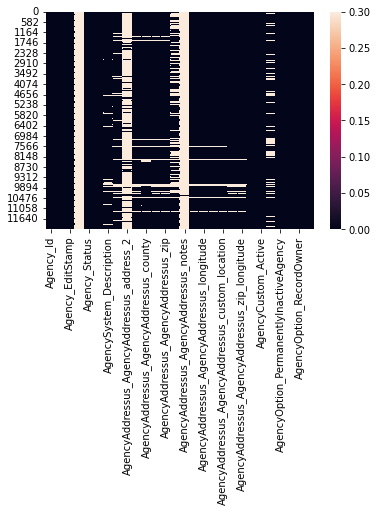

In [27]:
sns.heatmap(agencies.isnull(),cbar=True, vmin=0,vmax=.3)

In [28]:
agencies.isnull().sum()

Agency_Id                                              0
Agency_CreateStamp                                     0
Agency_EditStamp                                       0
Agency_AuditStamp                                  12214
Agency_Status                                          0
AgencySystem_Name                                     11
AgencySystem_Description                             697
AgencyAddressus_AgencyAddressus_address_1            991
AgencyAddressus_AgencyAddressus_address_2          10017
AgencyAddressus_AgencyAddressus_city                 443
AgencyAddressus_AgencyAddressus_county               411
AgencyAddressus_AgencyAddressus_state                433
AgencyAddressus_AgencyAddressus_zip                  457
AgencyAddressus_AgencyAddressus_country             4251
AgencyAddressus_AgencyAddressus_notes              12176
AgencyAddressus_AgencyAddressus_latitude             256
AgencyAddressus_AgencyAddressus_longitude            256
AgencyAddressus_AgencyAddressus

In [29]:
drop_agency = ['Agency_AuditStamp','AgencyAddressus_AgencyAddressus_address_2','AgencyAddressus_AgencyAddressus_notes','AgencyCustom_NonStandardHoursText','AgencyOption_RecordOwner','AgencyOption_AgencyFundedBy']

In [30]:
agencies.drop(drop_agency, inplace = True, axis = 1)

In [31]:
agencies.head(2)

,Agency_Id,Agency_CreateStamp,Agency_EditStamp,Agency_Status,AgencySystem_Name,AgencySystem_Description,AgencyAddressus_AgencyAddressus_address_1,AgencyAddressus_AgencyAddressus_city,AgencyAddressus_AgencyAddressus_county,AgencyAddressus_AgencyAddressus_state,...,AgencyAddressus_AgencyAddressus_latitude,AgencyAddressus_AgencyAddressus_longitude,AgencyAddressus_AgencyAddressus_validated,AgencyAddressus_AgencyAddressus_custom_location,AgencyAddressus_AgencyAddressus_zip_latitude,AgencyAddressus_AgencyAddressus_zip_longitude,AgencyAddressus_AgencyAddressus,AgencyCustom_Active,AgencyOption_PermanentlyInactiveAgency,AgencyOption_AgencyType
0,1,2017-03-16T10:13:28.999728-05:00,2022-05-12T12:53:25.967449-05:00,active,INTEGRATED COMMUNITY SOLUTIONS,"Integrated Community Solutions, Inc. (ICS) is ...",2605 S ONEIDA ST,GREEN BAY,BROWN,WI,...,44.479487,-88.069848,True,False,44.489906,-88.06991,"2605 S ONEIDA ST Suite 106 GREEN BAY WI, 54304",Yes,[],[]
1,2,2017-03-16T10:13:29.484781-05:00,2022-11-30T13:36:18.626176-06:00,active,INTERIM HEALTH CARE,A home health care agency that provides medica...,1600 Shawano Avenue,Green Bay,Brown,WI,...,44.530577,-88.060413,False,False,44.542973,-88.05582,"1600 Shawano Avenue Suite 201 Green Bay WI, 54303",Yes,[],[]


In [32]:
agency_closed = agencies[agencies['AgencyOption_PermanentlyInactiveAgency'].str.contains('Yes')].index 

In [33]:
agencies.drop(agency_closed, inplace=True)

In [34]:
agencies.shape

(10260, 22)

In [35]:
agencies['AgencyOption_AgencyType'].unique()

array(['[]', "['Non Profit']", "['For Profit']", "['Government']",
       "['Faith Based']", "['Coalition/Other Group']", "['Tribal']",
       "['Hospital']"], dtype=object)

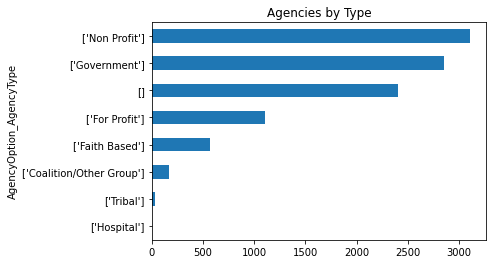

In [36]:
agencies.groupby(['AgencyOption_AgencyType'])['Agency_Id'].count().sort_values(ascending=True).plot(kind='barh',title='Agencies by Type')
#Greatest number of service providers are NFPs and Government Agencies. Need to figure out what the third categorey is... 

In [41]:
agencies.groupby(['AgencyAddressus_AgencyAddressus_county'])['Agency_Id'].count().sort_values(ascending=False).head(20)
# Counties with the largest number of agencies

AgencyAddressus_AgencyAddressus_county
Dane          986
Milwaukee     689
La Crosse     291
Rock          281
Brown         266
Marathon      264
Waukesha      259
BROWN         220
Wood          215
DANE          194
MARATHON      187
Eau Claire    178
Outagamie     169
Winnebago     158
Grant         132
St. Croix     124
Racine        121
Chippewa      114
Oneida        112
Winona        103
Name: Agency_Id, dtype: int64

In [38]:
agencies.groupby(['AgencyAddressus_AgencyAddressus_county'])['Agency_Id'].count().sort_values(ascending=False) # Most agencies and service providers in Dane, followed by Milwaukie, La Crosse, Rock, Brown

AgencyAddressus_AgencyAddressus_county
Dane              986
Milwaukee         689
La Crosse         291
Rock              281
Brown             266
                 ... 
Prince Georges      1
Hillsborough        1
Pottawattamie       1
JACKSON             1
portage             1
Name: Agency_Id, Length: 333, dtype: int64

In [66]:
agencies.to_csv("C:\\Users\\Kimberly\\Documents\\agencies.csv")

In [ ]:
# Exporting cleaned dataframe to local csv files to upload into Tableau for visualization

Below is the original interactions dataset slightly cleaned... Will check on dataset already cleaned to see if I can save any time...


In [42]:
interaction_data = pd.read_csv('https://github.com/datakind/UWWi_DataDive_Dec22/blob/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv?raw=true')
interaction_data.head()



,Client_Id,Interaction_CreateStamp,Interaction_ClientId,Interaction_Id,Interaction_CreateAccountId_href_label,Interaction_CreatePortalId,Interaction_CreateFormsetDeploymentId,Interaction_EditAccountId_href_label,Interaction_EditPortalId,Interaction_EditFormsetDeploymentId,...,InteractionOption_SwfSecondaryNeeds,InteractionOption_SwfCounty,InteractionOption_WhyWasThereNoReferralGiven,InteractionOption_UnableToContact,InteractionCustom_CallerReached,InteractionCustom_FollowUpUnmetNeeds,InteractionCustom_FollowUpComplete,InteractionCustom_FollowUpAttempt1,InteractionCustom_FollowUpAttempt2,InteractionCustom_FollowUpAttempt3
0,22934,2022-12-01T12:53:00.606552-06:00,22934,1405553,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
1,24900,2022-12-01T09:59:04.836496-06:00,24900,1405339,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
2,27820,2022-12-01T09:57:35.767512-06:00,27820,1405337,Melody Hobbs (743),1,689,Melody Hobbs (743),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
3,34433,2022-12-01T09:56:07.122672-06:00,34433,1405333,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Racine'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
4,24158,2022-12-01T08:58:26.516401-06:00,24158,1405271,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN


In [43]:
interaction_data.isnull().sum()

Client_Id                                                        0
Interaction_CreateStamp                                          0
Interaction_ClientId                                             0
Interaction_Id                                                   0
Interaction_CreateAccountId_href_label                           0
Interaction_CreatePortalId                                       0
Interaction_CreateFormsetDeploymentId                            0
Interaction_EditAccountId_href_label                             0
Interaction_EditPortalId                                         0
Interaction_EditFormsetDeploymentId                              0
Interaction_EditStamp                                            0
Interaction_AuditStamp                                        7399
Interaction_Status                                               0
InteractionReferral_ReferralsModule                             56
InteractionOption_CallCenterSiteNew                           

In [48]:
drop_interaction = ['Interaction_AuditStamp','InteractionCustom_FollowUpAttempt1','InteractionCustom_FollowUpAttempt2','InteractionCustom_FollowUpAttempt3']

In [49]:
interaction_data.drop(drop_interaction, inplace = True, axis = 1)

In [50]:
interaction_data.shape

(7399, 36)

In [51]:
interaction_data.head()

,Client_Id,Interaction_CreateStamp,Interaction_ClientId,Interaction_Id,Interaction_CreateAccountId_href_label,Interaction_CreatePortalId,Interaction_CreateFormsetDeploymentId,Interaction_EditAccountId_href_label,Interaction_EditPortalId,Interaction_EditFormsetDeploymentId,...,InteractionOption_WhatTypeOfMedia,InteractionOption_SwfPrimaryNeeds,InteractionOption_SwfPublicBenefitsProgramEnrollment,InteractionOption_SwfSecondaryNeeds,InteractionOption_SwfCounty,InteractionOption_WhyWasThereNoReferralGiven,InteractionOption_UnableToContact,InteractionCustom_CallerReached,InteractionCustom_FollowUpUnmetNeeds,InteractionCustom_FollowUpComplete
0,22934,2022-12-01T12:53:00.606552-06:00,22934,1405553,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Food'],[],[],['Milwaukee'],[],[],Unselected,Unselected,Unselected
1,24900,2022-12-01T09:59:04.836496-06:00,24900,1405339,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Other'],[],[],['Milwaukee'],[],[],Unselected,Unselected,Unselected
2,27820,2022-12-01T09:57:35.767512-06:00,27820,1405337,Melody Hobbs (743),1,689,Melody Hobbs (743),1,689,...,[],['Other'],[],[],['Milwaukee'],[],[],Unselected,Unselected,Unselected
3,34433,2022-12-01T09:56:07.122672-06:00,34433,1405333,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Food'],[],[],['Racine'],[],[],Unselected,Unselected,Unselected
4,24158,2022-12-01T08:58:26.516401-06:00,24158,1405271,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Shelter'],[],[],['Milwaukee'],[],[],Unselected,Unselected,Unselected


In [53]:
interactions=interaction_data[['Interaction_CreateStamp','Interaction_ClientId','InteractionOption_211CallType','InteractionOption_SwfPrimaryNeeds','InteractionOption_SwfSecondaryNeeds']]


In [54]:
interactions.head()

,Interaction_CreateStamp,Interaction_ClientId,InteractionOption_211CallType,InteractionOption_SwfPrimaryNeeds,InteractionOption_SwfSecondaryNeeds
0,2022-12-01T12:53:00.606552-06:00,22934,['Information and Referral'],['Food'],[]
1,2022-12-01T09:59:04.836496-06:00,24900,['Information and Referral'],['Other'],[]
2,2022-12-01T09:57:35.767512-06:00,27820,['Information and Referral'],['Other'],[]
3,2022-12-01T09:56:07.122672-06:00,34433,['Information and Referral'],['Food'],[]
4,2022-12-01T08:58:26.516401-06:00,24158,['Information and Referral'],['Shelter'],[]


In [56]:
interactions.shape

(7399, 5)

In [63]:
interactions.drop_duplicates()

,Interaction_CreateStamp,Interaction_ClientId,InteractionOption_211CallType,InteractionOption_SwfPrimaryNeeds,InteractionOption_SwfSecondaryNeeds
0,2022-12-01T12:53:00.606552-06:00,22934,['Information and Referral'],['Food'],[]
1,2022-12-01T09:59:04.836496-06:00,24900,['Information and Referral'],['Other'],[]
2,2022-12-01T09:57:35.767512-06:00,27820,['Information and Referral'],['Other'],[]
3,2022-12-01T09:56:07.122672-06:00,34433,['Information and Referral'],['Food'],[]
4,2022-12-01T08:58:26.516401-06:00,24158,['Information and Referral'],['Shelter'],[]
...,...,...,...,...,...
7394,2022-01-01T08:15:48.140952-06:00,2693,['Information and Referral'],[],[]
7395,2022-01-01T08:04:47.386645-06:00,24158,['Information and Referral'],[],[]
7396,2022-01-01T07:25:07.579897-06:00,27790,['Information and Referral'],[],[]
7397,2022-01-01T06:48:09.095198-06:00,33915,['Information and Referral'],[],[]


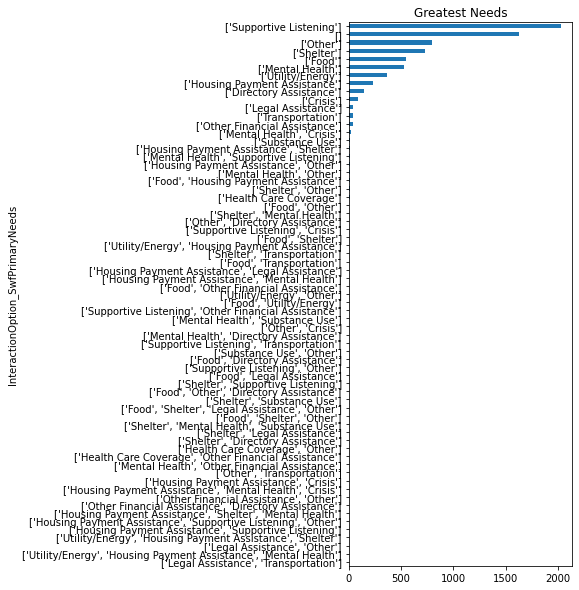

In [65]:
interactions.groupby(['InteractionOption_SwfPrimaryNeeds'])['Interaction_ClientId'].count().sort_values(ascending = True).plot(kind='barh', figsize=(4,10), title ='Greatest Needs')

The above graph illustrates that the greatest needs are with Supportive Listening, followed by unknown? then Other , Shelter, Food, Utility, Housing Assistance and Crisis. Will try to see if the site services correlate to these needs. 





Uploading the interactions dataset used by other team members to see if I can glean anything from taxonomy information relevant to site gap analysis.



In [44]:
interactions_cleaned = pd.read_csv('https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/f96140073a98265e95f3da2b1ca5a50c6367776b/uwwi_datasets/uwwi_dataset_interactions/cleaned_interactions_2022.csv')


In [45]:
interactions_cleaned.head()

,INTERACTION_ID,INTERACTION_CLIENTID,CLIENT_ID,SITE_ID,AGENCY_ID,PROGRAM_ID,SERVICE_ID,TAXONOMY_ID,TAXONOMY_NAME,DATEOFREFERRAL,AGENCY_PARENTID,SITESYSTEM_NAME,AGENCYSYSTEM_NAME,INTERACTIONREFERRAL_ID,AGENCYSYSTEM_PARENTNAME
0,1405553,22934,22934,28405,16176,None,49744,407858,Home Delivered Meals,None,16176,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...,2126639,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...
1,1405339,24900,24900,27086,15492,None,46833,409105,Municipal Police,None,15492,MILWAUKEE POLICE DEPARTMENT - DISTRICT 5,MILWAUKEE POLICE DEPARTMENT,2126282,MILWAUKEE POLICE DEPARTMENT
2,1405337,27820,27820,35612,16801,None,60112,407833,Winter Clothing,None,16801,MACCANON BROWN HOMELESS SANCTUARY,MACCANON BROWN HOMELESS SANCTUARY,2126276,MACCANON BROWN HOMELESS SANCTUARY
3,1405333,34433,34433,30187,16836,None,52044,407761,Food Pantries,None,16836,LIVING FAITH LUTHERAN CHURCH,LIVING FAITH LUTHERAN CHURCH,2126271,LIVING FAITH LUTHERAN CHURCH
4,1405271,24158,24158,27114,15510,None,46900,407978,Low Income/Subsidized Private Rental Housing,None,15510,UNITED METHODIST CHILDRENS SERVICES,UNITED METHODIST CHILDRENS SERVICES,2126161,"AgencySystem_ParentName: """"UNITED METHODIST C..."


In [82]:
interactions_cleaned.shape

(7399, 15)

In [83]:
interactions_cleaned=interactions_cleaned.rename(columns = {'INTERACTION_CLIENTID':'Interaction_ClientId'}) #df = df.rename(columns = {"Col_1":"Mod_col"})


In [84]:
interactions_cleaned.head()

,INTERACTION_ID,Interaction_ClientId,CLIENT_ID,SITE_ID,AGENCY_ID,PROGRAM_ID,SERVICE_ID,TAXONOMY_ID,TAXONOMY_NAME,DATEOFREFERRAL,AGENCY_PARENTID,SITESYSTEM_NAME,AGENCYSYSTEM_NAME,INTERACTIONREFERRAL_ID,AGENCYSYSTEM_PARENTNAME
0,1405553,22934,22934,28405,16176,None,49744,407858,Home Delivered Meals,None,16176,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...,2126639,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...
1,1405339,24900,24900,27086,15492,None,46833,409105,Municipal Police,None,15492,MILWAUKEE POLICE DEPARTMENT - DISTRICT 5,MILWAUKEE POLICE DEPARTMENT,2126282,MILWAUKEE POLICE DEPARTMENT
2,1405337,27820,27820,35612,16801,None,60112,407833,Winter Clothing,None,16801,MACCANON BROWN HOMELESS SANCTUARY,MACCANON BROWN HOMELESS SANCTUARY,2126276,MACCANON BROWN HOMELESS SANCTUARY
3,1405333,34433,34433,30187,16836,None,52044,407761,Food Pantries,None,16836,LIVING FAITH LUTHERAN CHURCH,LIVING FAITH LUTHERAN CHURCH,2126271,LIVING FAITH LUTHERAN CHURCH
4,1405271,24158,24158,27114,15510,None,46900,407978,Low Income/Subsidized Private Rental Housing,None,15510,UNITED METHODIST CHILDRENS SERVICES,UNITED METHODIST CHILDRENS SERVICES,2126161,"AgencySystem_ParentName: """"UNITED METHODIST C..."


In [85]:
interactions.shape

(7399, 5)

In [99]:
 interactions_final = pd.concat([interactions,interactions_cleaned], axis = 1) #Merging interactions and interacations cleaned dfs to get all cleaned information together
 

In [100]:
interactions_final.shape

(7399, 20)

In [101]:
interactions_final.head()

,Interaction_CreateStamp,Interaction_ClientId,InteractionOption_211CallType,InteractionOption_SwfPrimaryNeeds,InteractionOption_SwfSecondaryNeeds,INTERACTION_ID,Interaction_ClientId,CLIENT_ID,SITE_ID,AGENCY_ID,PROGRAM_ID,SERVICE_ID,TAXONOMY_ID,TAXONOMY_NAME,DATEOFREFERRAL,AGENCY_PARENTID,SITESYSTEM_NAME,AGENCYSYSTEM_NAME,INTERACTIONREFERRAL_ID,AGENCYSYSTEM_PARENTNAME
0,2022-12-01T12:53:00.606552-06:00,22934,['Information and Referral'],['Food'],[],1405553,22934,22934,28405,16176,None,49744,407858,Home Delivered Meals,None,16176,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...,2126639,AGING AND DISABILITY RESOURCE CENTER (ADRC) OF...
1,2022-12-01T09:59:04.836496-06:00,24900,['Information and Referral'],['Other'],[],1405339,24900,24900,27086,15492,None,46833,409105,Municipal Police,None,15492,MILWAUKEE POLICE DEPARTMENT - DISTRICT 5,MILWAUKEE POLICE DEPARTMENT,2126282,MILWAUKEE POLICE DEPARTMENT
2,2022-12-01T09:57:35.767512-06:00,27820,['Information and Referral'],['Other'],[],1405337,27820,27820,35612,16801,None,60112,407833,Winter Clothing,None,16801,MACCANON BROWN HOMELESS SANCTUARY,MACCANON BROWN HOMELESS SANCTUARY,2126276,MACCANON BROWN HOMELESS SANCTUARY
3,2022-12-01T09:56:07.122672-06:00,34433,['Information and Referral'],['Food'],[],1405333,34433,34433,30187,16836,None,52044,407761,Food Pantries,None,16836,LIVING FAITH LUTHERAN CHURCH,LIVING FAITH LUTHERAN CHURCH,2126271,LIVING FAITH LUTHERAN CHURCH
4,2022-12-01T08:58:26.516401-06:00,24158,['Information and Referral'],['Shelter'],[],1405271,24158,24158,27114,15510,None,46900,407978,Low Income/Subsidized Private Rental Housing,None,15510,UNITED METHODIST CHILDRENS SERVICES,UNITED METHODIST CHILDRENS SERVICES,2126161,"AgencySystem_ParentName: """"UNITED METHODIST C..."


In [102]:
interactions_final.to_csv("C:\\Users\\Kimberly\\Documents\\interactions.csv")